最终的结果为：theta=2.665017, k=1.951536


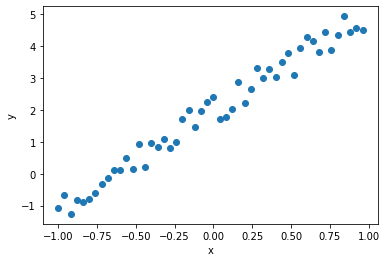

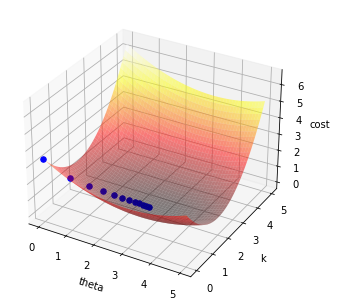

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(1)
#生成样本数据
x=np.arange(-1,1,step=0.04)#自变量
noise=np.random.uniform(low=-0.5,high=0.5,size=50)#噪声
y=x*3+2+noise#因变量
#显示待拟合数据
plt.figure(1)
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x,y)

#假设函数为一元线性函数：y=theta*x+k，需要求解的参数为theta和k
#损失函数为
def cost(theta, k, x, y):
    return 1/2*np.mean((theta*x+k-y)**2)

def cost_mesh(theta_m, k_m, x, y):
    z_m=np.zeros((theta_m.shape[0],theta_m.shape[1]))
    for i in range(theta_m.shape[0]):
        for j in range(theta_m.shape[1]):
            z_m[i,j]=cost(theta_m[i,j], k_m[i,j],x,y)
    return z_m
#可视化损失函数
theta_axis=np.linspace(start=0, stop=5,num=50)
k_axis=np.linspace(start=0, stop=5,num=50)
(theta_m, k_m)=np.meshgrid(theta_axis,k_axis)#网格化
z_m=cost_mesh(theta_m, k_m, x, y)
#绘制损失函数的3D图像
fig=plt.figure(2)
ax=Axes3D(fig)#为figure添加3D坐标轴
ax.set_xlabel('theta')
ax.set_ylabel('k')
ax.set_zlabel('cost')
ax.plot_surface(theta_m, k_m, z_m,rstride=1, cstride=1,cmap=plt.cm.hot, alpha=0.5)#绘制3D的表面, rstide为行跨度，cstride为列跨度

#梯度下降法
#参数设置
lr=0.01#学习率
epoches=600#迭代次数,即迭代终止条件

#参数初始数值
theta=0
k=0

#迭代更新参数
for i in range(epoches):
    theta_gra=np.mean((theta*x+k-y)*x)#theta梯度
    k_gra=np.mean(theta*x+k-y)#k梯度
    #更新梯度
    theta-=theta_gra*lr
    k-=k_gra*lr
    #绘制当前参数所在的位置
    if i%50==0:
        ax.scatter3D(theta, k, cost(theta, k, x,y), marker='o', s=30, c='b')
print('最终的结果为：theta=%f, k=%f'%(theta, k))
plt.show()
